In [1]:
import pandas as pd


In [2]:
listing = pd.read_csv(r"C:\Users\asus laptop\Documents\Listings.csv", encoding="ISO-8859-1", low_memory=False)

In [3]:
pwd

'C:\\Users\\asus laptop'

In [4]:
listing.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [5]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [6]:
listing["host_since"] = pd.to_datetime(listing["host_since"])
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [7]:
paris_listing = ( listing.query("city == 'Paris'").loc[:,["host_since", "neighbourhood", "city", "accommodates", "price"]])

In [8]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [9]:
paris_listing.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [10]:
paris_listing.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [11]:
paris_listing.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [12]:
paris_listings = paris_listing.groupby("neighbourhood")
paris_listings.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60
...,...,...,...,...,...
279,2014-10-05,Hotel-de-Ville,Paris,2,100
285,2011-08-08,Bourse,Paris,2,65
286,2016-03-24,Hotel-de-Ville,Paris,2,120
315,2015-06-18,Hotel-de-Ville,Paris,2,50


In [13]:
paris_listing1 = paris_listings.agg({"price" : "mean"}).sort_values("price")
print(paris_listing1)

                          price
neighbourhood                  
Menilmontant          74.942257
Buttes-Chaumont       82.690182
Buttes-Montmartre     87.209479
Reuilly               89.058402
Popincourt            90.559459
Gobelins              98.110184
Observatoire         101.866801
Batignolles-Monceau  102.612702
Enclos-St-Laurent    102.967156
Vaugirard            106.831330
Opera                119.038644
Pantheon             122.662150
Temple               138.446823
Hotel-de-Ville       144.472110
Bourse               149.496801
Luxembourg           155.638639
Palais-Bourbon       156.856578
Passy                161.144635
Louvre               175.379972
Elysee               210.536765


In [14]:
paris_listing_acc = listing.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price": "mean"}).sort_values("price")
paris_listing_acc.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [15]:
paris_listings_overtime = paris_listing.set_index("host_since").resample("Y").agg({"price": "mean", "neighbourhood": "count"})
paris_listings_overtime.head()

,price,neighbourhood
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592


Axes(0.125,0.11;0.775x0.77)


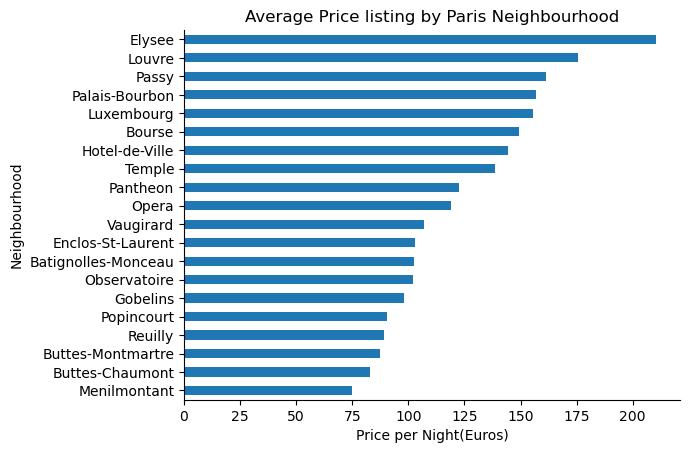

In [21]:
import seaborn as sns
hb = paris_listing1.plot.barh(
title = "Average Price listing by Paris Neighbourhood",
    xlabel = "Price per Night(Euros)",
    ylabel = "Neighbourhood",
    legend = None
)
print(hb)
sns.despine()

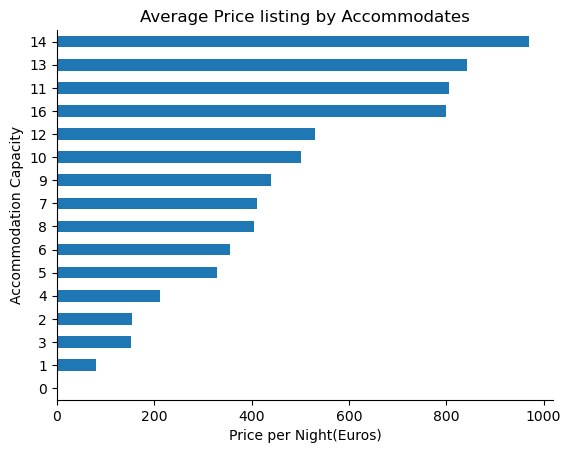

In [25]:
paris_listing_acc.plot.barh(
title= "Average Price listing by Accommodates",
  xlabel="Price per Night(Euros)",
    ylabel="Accommodation Capacity",
    legend=None
)
sns.despine()

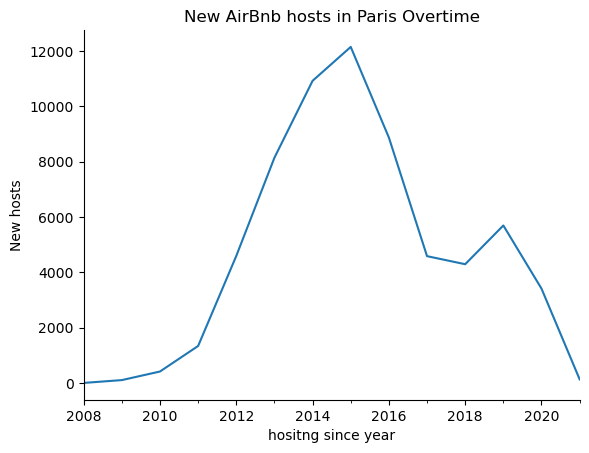

In [28]:
paris_listings_overtime["neighbourhood"].plot(xlabel="hositng since year", ylabel = "New hosts", title="New AirBnb hosts in Paris Overtime")
sns.despine()

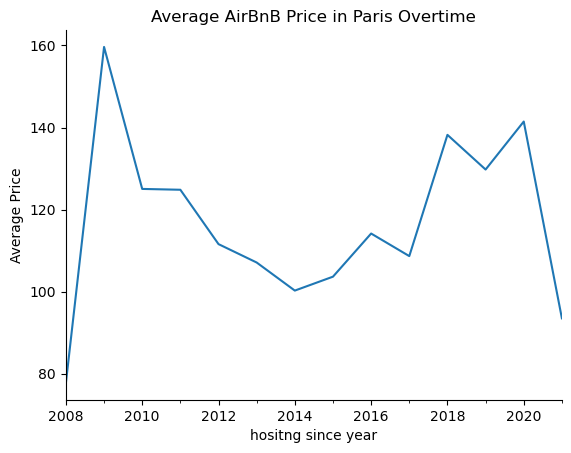

In [30]:
paris_listings_overtime["price"].plot(xlabel="hositng since year", ylabel = "Average Price", title="Average AirBnB Price in Paris Overtime")
sns.despine()